# July 2023 Cu-K

dTHF + LiBF4 + EtOH



In [120]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [148]:
project_dir = os.path.expanduser('~/git/nh3-analysis/july2023/')
data_dir = os.path.expanduser('/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-K')

#dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting'))
dyn_model_dir = os.path.expanduser('~/reflectivity_fits/IPTS-30384')

#results_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting', 'results'))


# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-30384/shared/autoreduce/'

# Directory with fit results
#fit_dir = os.path.expanduser('~/reflectivity_fits/IPTS-30384')
#fit_dir = os.path.expanduser('/SNS/users/vniemann12/reflectivity_fits/IPTS-30384')
fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/'

dynamic_run = 207275 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-K/30s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207275-dyn/results-30s-bck-v2'



## Summary of 60 Hz data

/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207268/__model-profile.dat
/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207282/__model-profile.dat


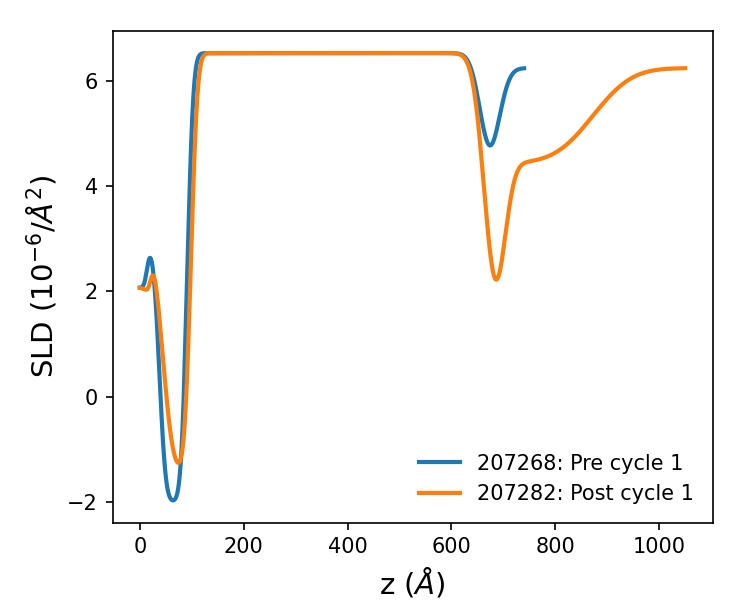

In [149]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207268, "207268: Pre cycle 1", fit_dir=fit_dir, show_cl=False)
summary_plots.plot_sld(207282, "207282: Post cycle 1", fit_dir=fit_dir, show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


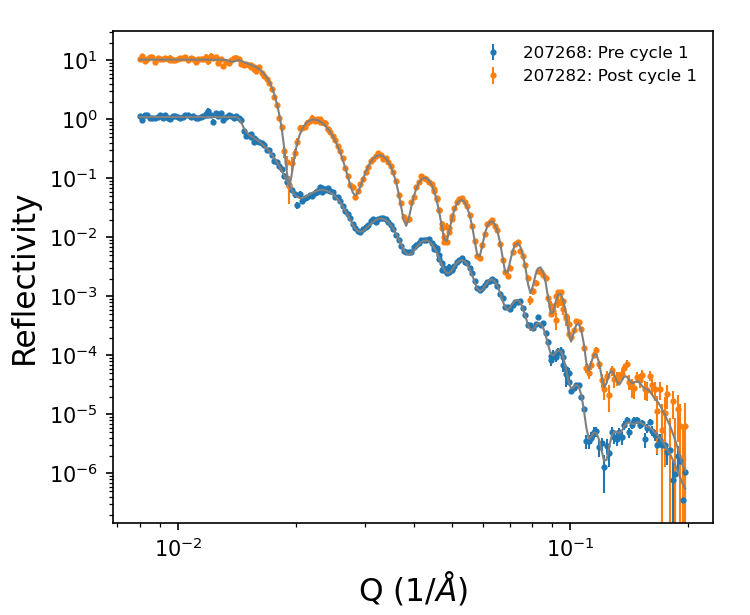

In [150]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(207268, '207268: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(207282, '207282: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


## CP 1: Change as a function of time

/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-K/30s
23
Ref r207275_t000000.txt
Skipped: 0


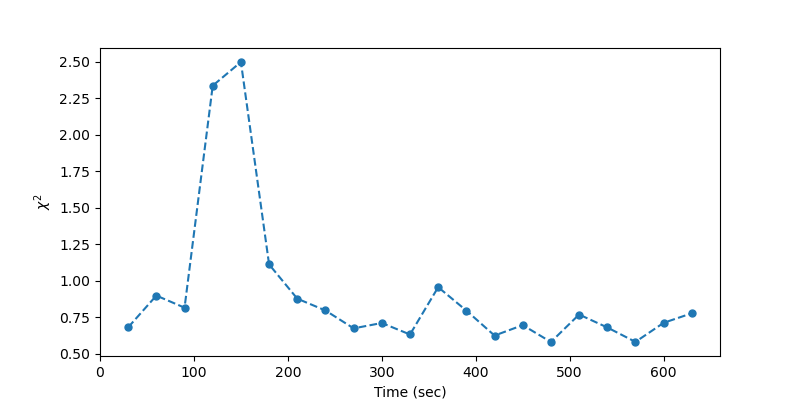

In [151]:
importlib.reload(summary_plots)
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(207275, dyn_data_dir, first=0, last=-1, out_array=None)

## CP 2: Change as a function of time

/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-K/30s
42
Ref r207289_t000000.txt
Skipped: 0


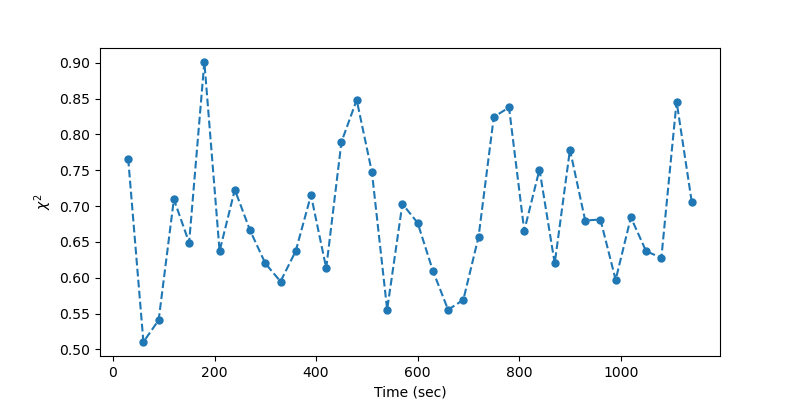

In [127]:
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(207289, dyn_data_dir, first=0, last=-1, out_array=None)

23


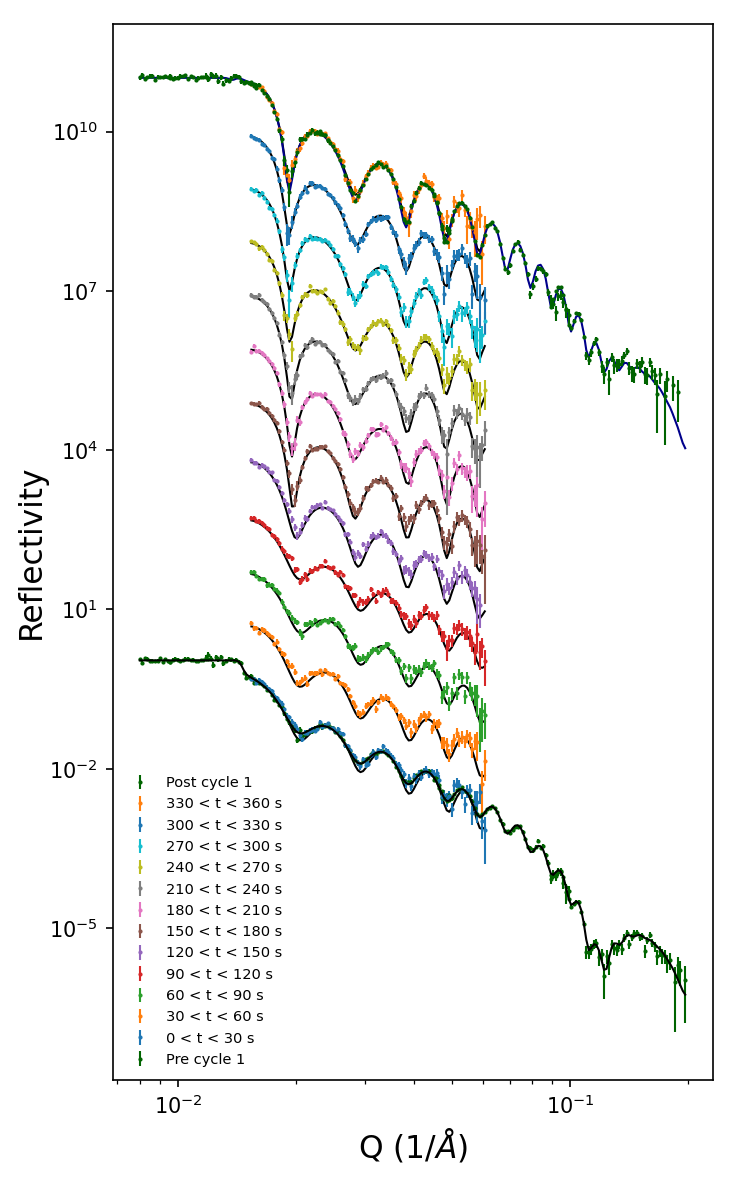

In [216]:
importlib.reload(summary_plots)

file_list = summary_plots.plot_dyn_data(dynamic_run, 207268, 207282, first_index=0, last_index=12, delta_t=30, model_name='model-loop-207275',
                                        fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207268/__model-profile.dat
Processing: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207275-dyn/results-30s-bck-v2/r207275_t000330/model-loop-207275.py
Read in /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207275-dyn/results-30s-bck-v2/r207275_t000330/model-loop-207275.py
Model: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207275-dyn/results-30s-bck-v2/r207275_t000090/model-loop-207275
Z offset = -174.763;    Z_max = 1032.1
Too many points: pruning down
MC file read: 0.0011565685272216797 sec
Done 5.882256269454956 sec
Processing: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207275-dyn/results-30s-bck-v2/r207275_t000330/model-loop-207275.py
Read in /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207275-dyn/results-30s-bck-v2/r207275_t000330/model-loop-207275.py
Model: /SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207275-dyn/results-30s-bck-v2/r207275_t000120/model-loop-207275
Z offset = -176.

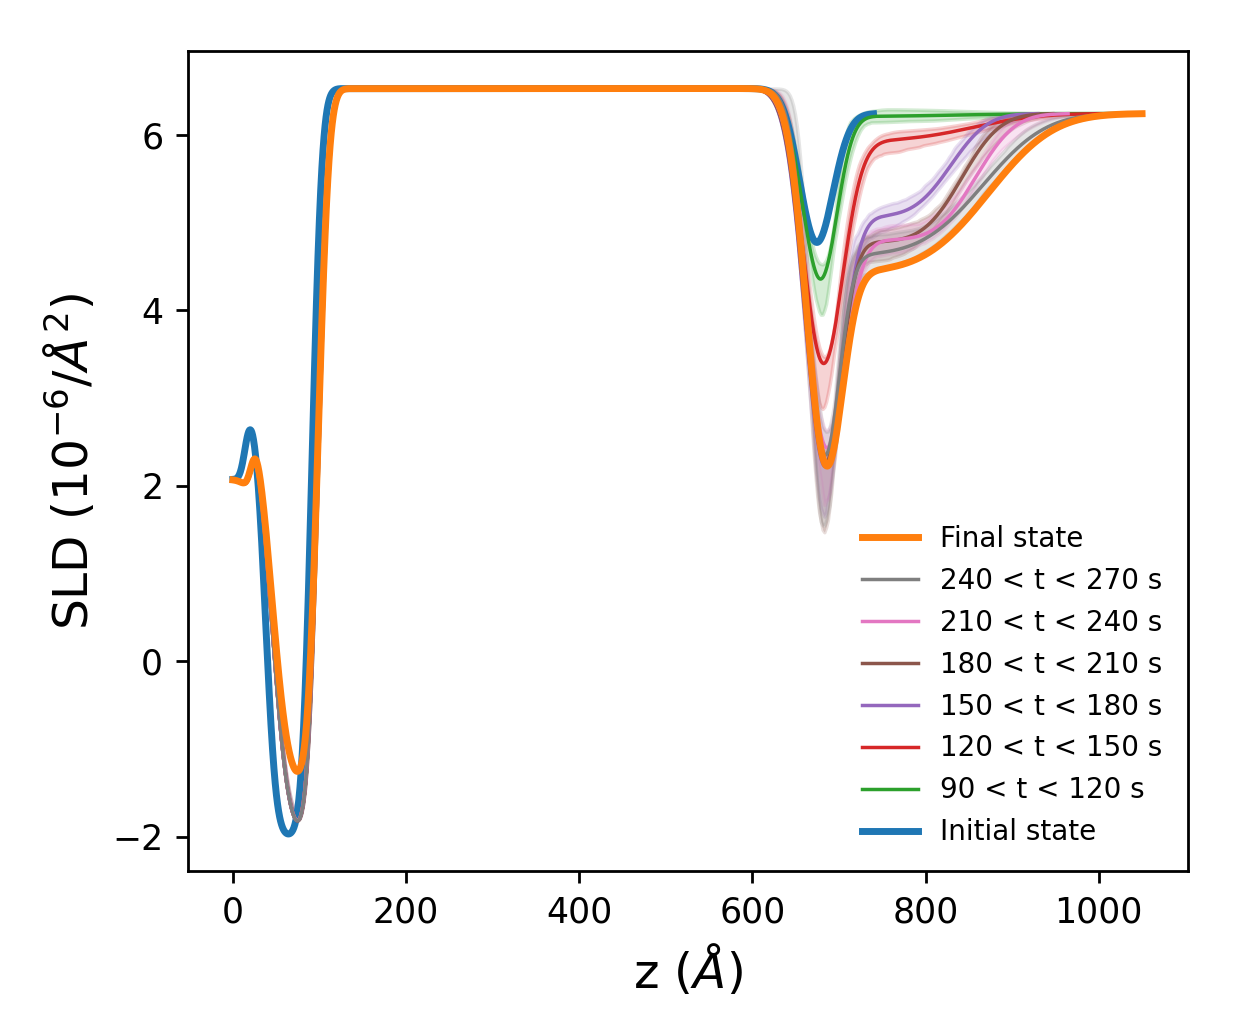

In [184]:
# Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-207275.py')

_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

summary_plots.plot_dyn_sld(_file_list, 207268, 207282, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, delta_t=30, 
                           show_cl=True, model_file=model_file, model_name='model-loop-207275', legend_font_size=8)

THF interface 17.95731747500372
material interface 17.355499987203054
material rho 3.3744718660019917
material thickness 25.748387449038727
Ti rho -1.9976671400626964


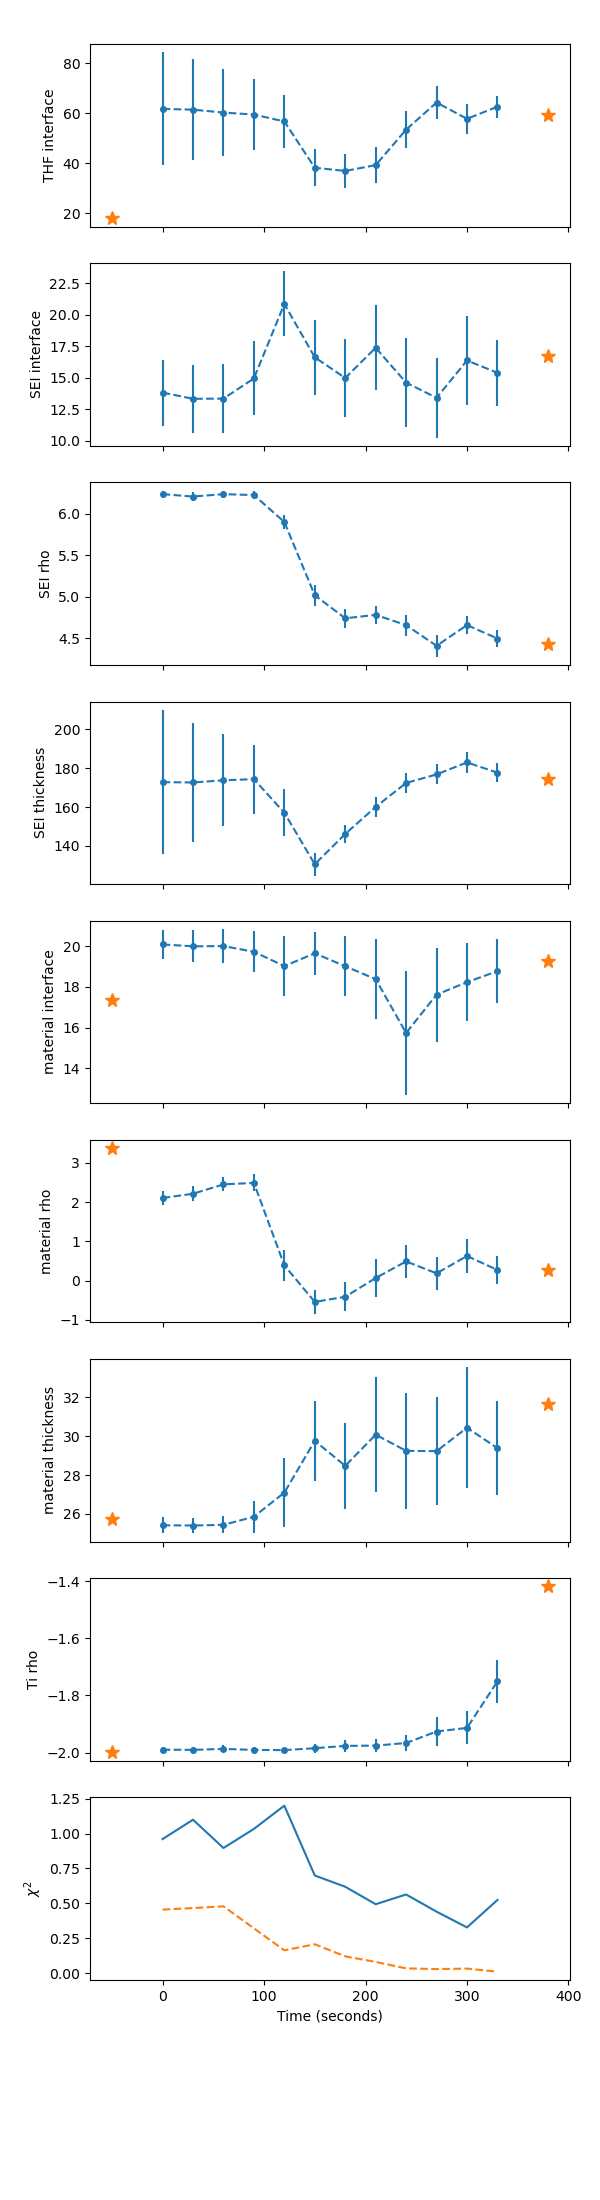

In [217]:
importlib.reload(summary_plots)

trend_values, trend_err = summary_plots.trend_data(file_list, 207268, 207282, 
                                                   fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207275', model_file=None, add_plot=0)


# Comparison between my results and Val's

/SNS/users/m2d/reflectivity_fits/IPTS-30384/207296/__model-profile.dat
Processing: /SNS/users/m2d/reflectivity_fits/IPTS-30384/207296/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-30384/207296/__model.py
Z offset = -153.115;    Z_max = 1013.1
Too many points: pruning down
MC file read: 0.004126548767089844 sec
Done 1.2651143074035645 sec
/SNS/users/m2d/reflectivity_fits/IPTS-30384/207177/__model-profile.dat
Processing: /SNS/users/m2d/reflectivity_fits/IPTS-30384/207177/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-30384/207177/__model.py
Z offset = -219.808;    Z_max = 1092.3
Too many points: pruning down
MC file read: 0.004048347473144531 sec
Done 1.3298664093017578 sec
/SNS/users/vniemann12/reflectivity_fits/IPTS-30384/207302/__model-profile.dat
Processing: /SNS/users/vniemann12/reflectivity_fits/IPTS-30384/207302/__model.py
Read in /SNS/users/vniemann12/reflectivity_fits/IPTS-30384/207302/__model.py
Z offset = -166.808;    Z_max = 1039.4
Too many points: prunin

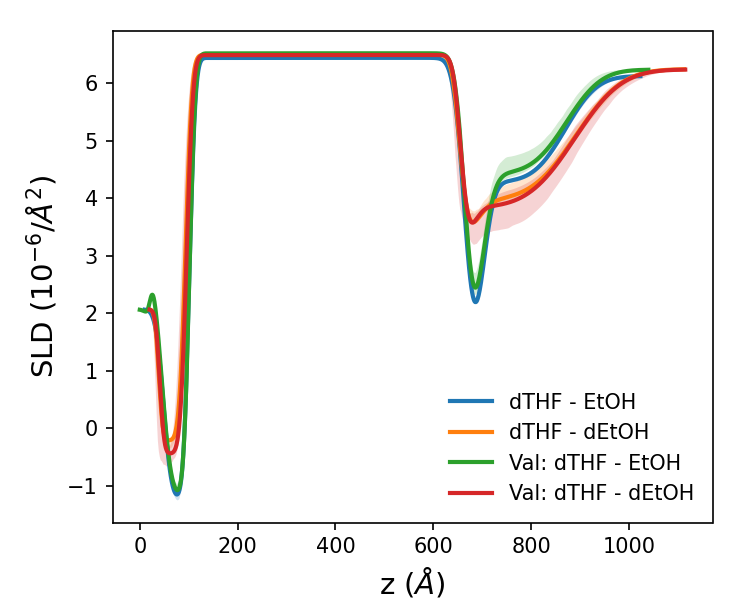

In [138]:
importlib.reload(summary_plots)

mat_dir = os.path.expanduser('~/reflectivity_fits/IPTS-30384')
val_dir = os.path.expanduser('/SNS/users/vniemann12/reflectivity_fits/IPTS-30384')


fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207296, "dTHF - EtOH", fit_dir=mat_dir, show_cl=True, z_offset=10)
summary_plots.plot_sld(207177, "dTHF - dEtOH", fit_dir=mat_dir, show_cl=True, z_offset=20)

# OCV 1
#summary_plots.plot_sld(207273, "dTHF - EtOH", fit_dir=val_dir, show_cl=False)
#summary_plots.plot_sld(207167, "dTHF - dEtOH", fit_dir=val_dir, show_cl=True, z_offset=36.0)

# OCV 2
#summary_plots.plot_sld(207288, "dTHF - EtOH", fit_dir=val_dir, show_cl=False)
#summary_plots.plot_sld(207175, "dTHF - dEtOH", fit_dir=val_dir, show_cl=True, z_offset=30.0)

# OCV 3
summary_plots.plot_sld(207302, "Val: dTHF - EtOH", fit_dir=val_dir, show_cl=True)
summary_plots.plot_sld(207183, "Val: dTHF - dEtOH", fit_dir=val_dir, show_cl=True, z_offset=20.0)

# OCV 4
#summary_plots.plot_sld(207310, "dTHF - EtOH", fit_dir=val_dir, show_cl=True)
#summary_plots.plot_sld(207193, "dTHF - dEtOH", fit_dir=val_dir, show_cl=True, z_offset=-3.0)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()

In [219]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207275.json')
summary_plots.write_md_table(trend_file)
